In [5]:
import pandas as pd
import numpy as np
import datasets
import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from baseline01  import Baseline01
from baseline02  import Baseline02SMA
from baseline02  import Baseline02EWMA
from IPython.display import display

In [6]:
#### EURUSD 2015 dataset (note: non-normalised labels)

In [7]:
# load  dataset
lookahead=1
dataset = 'DS3T'
window=25
sym='EURUSD'
year=2015
title = sym + " " + str(year)
X_test, Y_test, prices_test = datasets.load(datasets.filename(dataset, lookahead, window, sym, year))

In [8]:
model = Baseline01(lookahead=1)
Y_test_pred = model.predict(prices_test)
metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, cum_return_plot=False);

EURUSD 2015: f1-score: 0.493, mean future return: -0.015 bps, (-0.015 bps), annualized future return -0.439 (-0.436)


In [9]:
best = None
best_w = None
for w in range(1,21):
    model = Baseline02SMA(lookahead=1, window=w)
    Y_test_pred = model.predict(prices_test)
    m = metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, no_print=True);
  
    print w,m['f1_score']
    if best is None or m['f1_score'] > best:
        best = m['f1_score']
        best_w = w

print("Best centre-of-mass: ", best_w)
model = Baseline02SMA(lookahead=1, window=best_w)
Y_test_pred = model.predict(prices_test)
metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, cum_return_plot=False, heatmap=False);


1 0.492881335459
2 0.490105895906
3 0.488938412434
4 0.487612848063
5 0.487630647791
6 0.487407925414
7 0.487438146447
8 0.486933416537
9 0.486026486858
10 0.485925013723
11 0.485809904138
12 0.485793324007
13 0.485335067362
14 0.485346494868
15 0.48640480237
16 0.486210831734
17 0.485870610382
18 0.485356318438
19 0.485628339835
20 0.485601544884
('Best centre-of-mass: ', 1)
EURUSD 2015: f1-score: 0.493, mean future return: -0.015 bps, (-0.015 bps), annualized future return -0.439 (-0.436)


In [10]:
best = None
best_w = None
for w in range(1,21):
    model = Baseline02EWMA(lookahead=1, centre_of_mass=w)
    Y_test_pred = model.predict(prices_test)
    m = metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, no_print=True);
  
    print(w,m['f1_score'])
    if best is None or m['f1_score'] > best:
        best = m['f1_score']
        best_w = w

print("Best centre-of-mass: ", best_w)
model = Baseline02EWMA(lookahead=1, centre_of_mass=best_w)
Y_test_pred = model.predict(prices_test)
metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, cum_return_plot=False, heatmap=False);


(1, 0.48522933231296167)
(2, 0.48443807152938678)
(3, 0.48442455470632717)
(4, 0.48344822001513427)
(5, 0.48302337197263223)
(6, 0.48340352155973204)
(7, 0.48318025153795746)
(8, 0.48267182627781685)
(9, 0.48263584965770284)
(10, 0.48221902999817118)
(11, 0.4821407685140795)
(12, 0.48223456191693742)
(13, 0.48233803215393617)
(14, 0.48238408779407782)
(15, 0.48257881713321266)
(16, 0.48234230217788399)
(17, 0.48215427963914792)
(18, 0.48210491085010787)
(19, 0.48187552795648303)
(20, 0.48188411256402186)
('Best centre-of-mass: ', 1)
EURUSD 2015: f1-score: 0.485, mean future return: -0.024 bps, (-0.024 bps), annualized future return -0.585 (-0.585)


---------------

#### Idea - inverted signal

Models all give negative results, suggesting that over short timescales price change is mean-reverting. 
Let's try invert the signal, and tune for best performance

In [11]:
model = Baseline01(lookahead=1)
Y_test_pred = 1.0 - model.predict(prices_test)
metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, cum_return_plot=False);

EURUSD 2015: f1-score: 0.516, mean future return: 0.015 bps, (0.015 bps), annualized future return 0.772 (0.780)


('Best w is', 9)


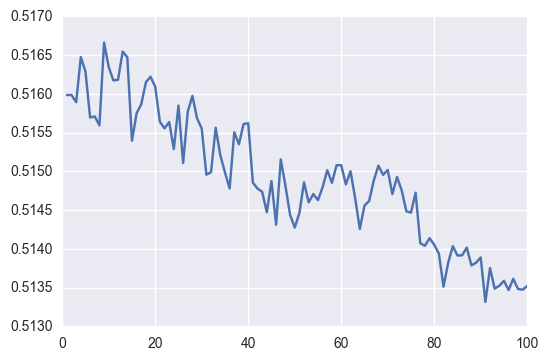

In [25]:
ws = []
f1s = []
best = None
best_w = None
for w in range(1,101):
#for w in range(21,201,10):
#for w in range(1,5001,100):
    model = Baseline02SMA(lookahead=1, window=w)
    Y_test_pred = 1.0 - model.predict(prices_test)
    m = metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, no_print=True);
    ws.append(w)
    f1s.append(m['f1_score'])
    #print (w, m['f1_score'])

    if best is None or m['f1_score'] > best:
        best = m['f1_score']
        best_w = w
        
plt.plot(ws, f1s)
print("Best w is", best_w)

In [18]:
model = Baseline02SMA(lookahead=1, window=9)
Y_test_pred = 1.0 - model.predict(prices_test)
metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, cum_return_plot=False, heatmap=False);

EURUSD 2015: f1-score: 0.517, mean future return: 0.020 bps, (0.020 bps), annualized future return 1.140 (1.142)


('Best w is', 21)


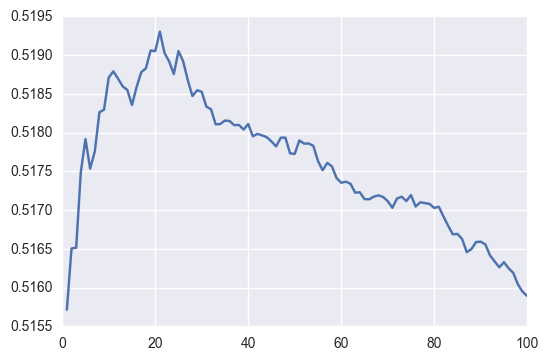

In [24]:
ws = []
f1s = []
best = None
best_w = None
for w in range(1,101):
#for w in range(21,201,10):
#for w in range(1,5001,100):
    model = Baseline02EWMA(lookahead=1, centre_of_mass=w)
    Y_test_pred = 1.0 - model.predict(prices_test)
    m = metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, no_print=True);
    ws.append(w)
    f1s.append(m['f1_score'])
    #print (w, m['f1_score'])

    if best is None or m['f1_score'] > best:
        best = m['f1_score']
        best_w = w
        
plt.plot(ws, f1s)
print("Best w is", best_w)

In [23]:
model = Baseline02EWMA(lookahead=1, centre_of_mass=21)
Y_test_pred = 1.0 - model.predict(prices_test)
metrics.performance_report(title,  prices_test,  lookahead, Y_test, Y_test_pred, cum_return_plot=False, heatmap=False);

EURUSD 2015: f1-score: 0.519, mean future return: 0.022 bps, (0.022 bps), annualized future return 1.273 (1.272)
